In [2]:
import pandas as pd 
import numpy as np 

In [33]:
df = pd.read_csv("forecast_history.csv")

In [34]:
df

,Unnamed: 0,Median house price,Westpac: 4 year forecast,Joe Bloggs: 2 year forecast,Harry Spent: 5 year forecast
0,2011,340000,56%,23%,-20%
1,2012,370000,53%,34$,-80%
2,2013,350000,NaN,19%,-70%
3,2014,420000,13%,42%,-80%
4,2015,425000,33%,23%,-50%
5,2016,500000,-5%,15%,-90%
6,2017,520000,45%,1500%,-30%
7,2018,550000,34%,18%,NaN
8,2019,596000,34%,19%,-110%
9,2020,610000,20%,23%,-90%


In [35]:
df = df.rename(columns={'Unnamed: 0' : 'Year'})

In [36]:
df.fillna(method='ffill', inplace= True)

In [37]:
df['Westpac: 4 year forecast'] = df['Westpac: 4 year forecast'].replace('I5%', '15%')

In [38]:
df['Joe Bloggs: 2 year forecast'] = df['Joe Bloggs: 2 year forecast'].replace('34$','34%')

In [39]:
for column in ['Westpac: 4 year forecast', 'Joe Bloggs: 2 year forecast', 'Harry Spent: 5 year forecast']:
    df[column] = df[column].str.replace('%','').astype(float)

In [40]:
df['Joe Bloggs: 2 year forecast'] = df['Joe Bloggs: 2 year forecast'].replace(1500, 15)


In [41]:
df['Median house price'] = df['Median house price'].replace('760O00', 760000)

In [42]:
df['Median house price'] = df['Median house price'].astype(int)

In [43]:
for column in ['Westpac: 4 year forecast', 'Joe Bloggs: 2 year forecast', 'Harry Spent: 5 year forecast']:
    df[column] = df[column].astype(float)

In [44]:
df['Year'] = df['Year'].astype(int)

In [47]:
for column in ['Westpac: 4 year forecast', 'Joe Bloggs: 2 year forecast', 'Harry Spent: 5 year forecast']:
    print(df[column].mean())

24.0
18.357142857142858
-67.07142857142857


In [48]:
for column in ['Westpac: 4 year forecast', 'Joe Bloggs: 2 year forecast', 'Harry Spent: 5 year forecast']:
    df[column] = abs(df[column])

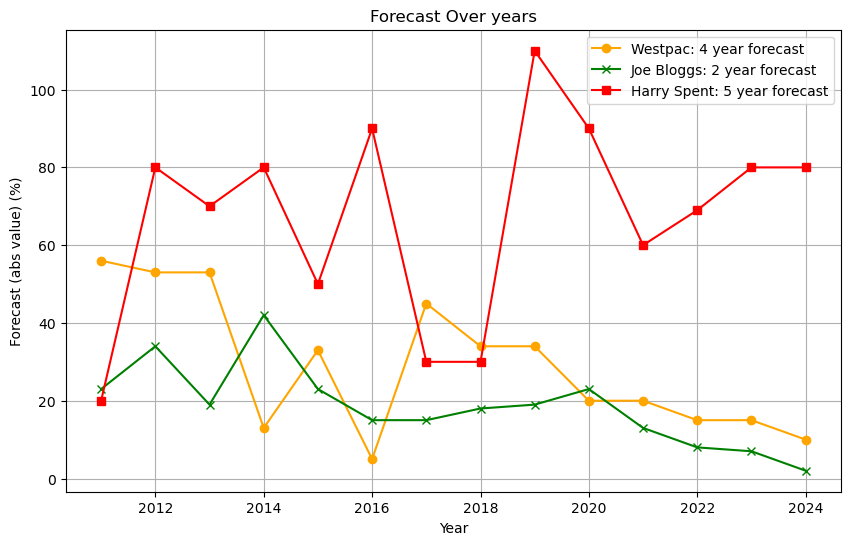

In [51]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Westpac: 4 year forecast'], label='Westpac: 4 year forecast', color='orange', marker='o')
plt.plot(df['Year'], df['Joe Bloggs: 2 year forecast'], label='Joe Bloggs: 2 year forecast', color='green', marker='x')
plt.plot(df['Year'], df['Harry Spent: 5 year forecast'], label='Harry Spent: 5 year forecast', color='red', marker='s')

plt.title('Forecast Over years')
plt.xlabel('Year')
plt.ylabel('Forecast (abs value) (%)')
plt.legend()
plt.grid(True)
plt.show()